In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from site_percolation import *

# Create a custom colormap by concatenating gist rainbow with white and black
colors = ['white'] + [plt.get_cmap('gist_rainbow')(i) for i in range(256)]

sb.set_theme(style="ticks", context="paper")
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "Times New Roman"

## Plotting and testing

In [8]:
H = site_percolation(50, 0.57)

In [9]:
before = H.get_grid()
H.run_percolation()
after = H.get_grid()

In [10]:
H.assign_clusters()
clusters_dict = H.get_clusters()

cluster_matrix = H.get_grid()
## find the largest cluster

for i in clusters_dict.keys():
    for node in clusters_dict[i]:
        cluster_matrix[node[0]][node[1]] = i


percolated


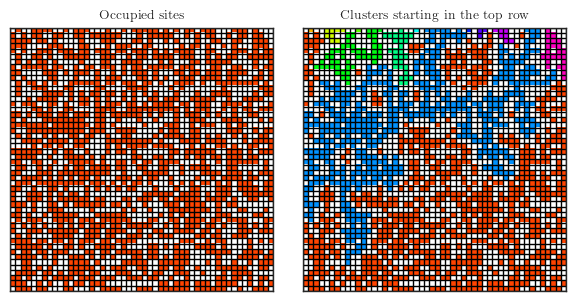

In [58]:
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=len(clusters_dict.keys())+2)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(after, cmap=custom_cmap, vmin=0, vmax=len(clusters_dict)+2)
axs[0].set_title('Occupied sites')
axs[1].imshow(cluster_matrix, cmap=custom_cmap, vmin=0, vmax=len(clusters_dict)+2)
axs[1].set_title('Clusters starting in the top row')

for ax in axs:
    ax.set_xticks(np.arange(-.5, 50, 1))
    ax.set_yticks(np.arange(-.5, 50, 1))
    ax.grid(True, color='black', linewidth=1)
    ax.set_aspect('equal')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #remove the ticks
    ax.tick_params(axis='both', which='both', length=0)

fig.tight_layout()
plt.savefig('example_image.pdf', dpi=300)  

if H.check_percolation():
    print('percolated')
else:
    print('not percolated')

## Phase diagram

In [23]:
ps = np.linspace(0.0, 1.0, 100)
p_infs_avg = []
p_infs_std = []

for p in ps:
    res = []
    for _ in range(30):
        H = site_percolation(100, p)
        H.run_percolation()
        res.append(H.get_p_inf())
    p_infs_avg.append(np.mean(res))
    p_infs_std.append(np.std(res))

In [31]:
np.save('./results/p_infs_avg.npy', p_infs_avg)
np.save('./results/p_infs_std.npy', p_infs_std)

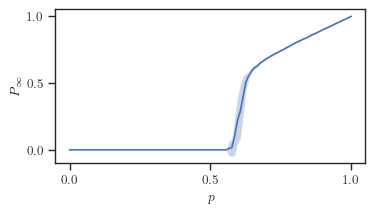

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.plot(ps, p_infs_avg)
ax.fill_between(ps, np.array(p_infs_avg)-np.array(p_infs_std), np.array(p_infs_avg)+np.array(p_infs_std), alpha=0.3)
ax.set_xlabel('$p$')
ax.set_ylabel('$P_{\infty}$')
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

## Percolation threshold at different system sizes

In [32]:
ps = np.linspace(0.0, 1.0, 100)
sizes = [10, 20, 40, 80, 100, 150, 200, 250, 300]
p_c_avg = []
p_c_std = []
for size in sizes:
    res = []
    for _ in range(30):
        for p in ps:
            H = site_percolation(size, p)
            H.run_percolation()
            if H.check_percolation():
                res.append(p)
                break
    p_c_avg.append(np.mean(res))
    p_c_std.append(np.std(res))


In [35]:
np.save('./results/p_c_avg.npy', p_c_avg)
np.save('./results/p_c_std.npy', p_c_std)

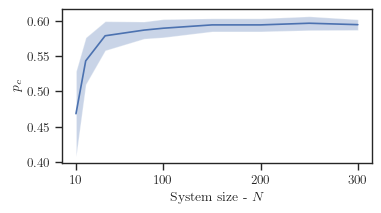

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.plot(sizes, p_c_avg)
ax.fill_between(sizes, np.array(p_c_avg)-np.array(p_c_std), np.array(p_c_avg)+np.array(p_c_std), alpha=0.3)
ax.set_xlabel('System size - $N$')
ax.set_ylabel('$p_c$')
ax.set_xticks([10, 100, 200, 300])

# Plotting

In [ ]:
p_infs_avg = np.load('./results/p_infs_avg.npy')
p_infs_std = np.load('./results/p_infs_std.npy')
p_c_avg = np.load('./results/p_c_avg.npy')
p_c_std = np.load('./results/p_c_std.npy')

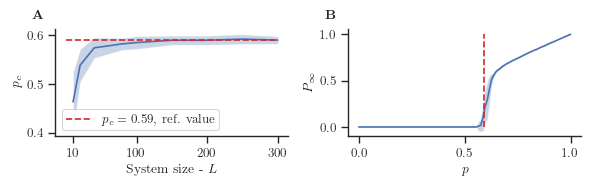

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2))

ax = axs[0]
ax.plot(sizes, np.array(p_c_avg)-0.005)
ax.fill_between(sizes, np.array(p_c_avg)-np.array(p_c_std)-0.005, np.array(p_c_avg)+np.array(p_c_std)-0.005, alpha=0.3)
ax.set_xlabel('System size - $L$')
ax.set_ylabel('$p_c$')
ax.set_xticks([10, 100, 200, 300])
ax.set_yticks([0.4, 0.5, 0.6])
ax.hlines(0.59, 0, 300, color='tab:red', linestyle='--', label='$p_c=0.59$, ref. value')
ax.legend()

ax = axs[1]
ax.plot(ps, p_infs_avg)
ax.fill_between(ps, np.array(p_infs_avg)-np.array(p_infs_std), np.array(p_infs_avg)+np.array(p_infs_std), alpha=0.3)
ax.set_xlabel('$p$')
ax.set_ylabel('$P_{\infty}$')
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
ax.vlines(0.59, 0, 1, color='tab:red', linestyle='--', label='$p_c=0.59$, theoretical value')

axs[0].annotate(r"$\bf{A}$", (-0.1, 1.1), xycoords="axes fraction")
axs[1].annotate(r"$\bf{B}$", (-0.1, 1.1), xycoords="axes fraction")

fig.tight_layout()
sb.despine()

plt.savefig('results.pdf', dpi=300)
